In [ ]:
%pip install --upgrade pip
%pip install ucimlrepo
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# metadata
print(wine_quality.metadata.tasks)
print(wine_quality.metadata.characteristics)
print(wine_quality.metadata.num_instances)
print(wine_quality.metadata.num_features)
print(wine_quality.metadata.additional_info.summary)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets


# Merge features, others, and target into one dataframe
df = pd.concat([wine_quality.data.features, wine_quality.data.others, wine_quality.data.targets], axis=1)

# display the data into a beautiful table
df


['Classification', 'Regression']
['Multivariate']
4898
11
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
# summary statistics
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# calculate the variance of each feature
df.var()

fixed_acidity              1.680740
volatile_acidity           0.027105
citric_acid                0.021117
residual_sugar            22.636696
chlorides                  0.001227
free_sulfur_dioxide      315.041192
total_sulfur_dioxide    3194.720039
density                    0.000009
pH                         0.025853
sulphates                  0.022143
alcohol                    1.422561
quality                    0.762575
dtype: float64

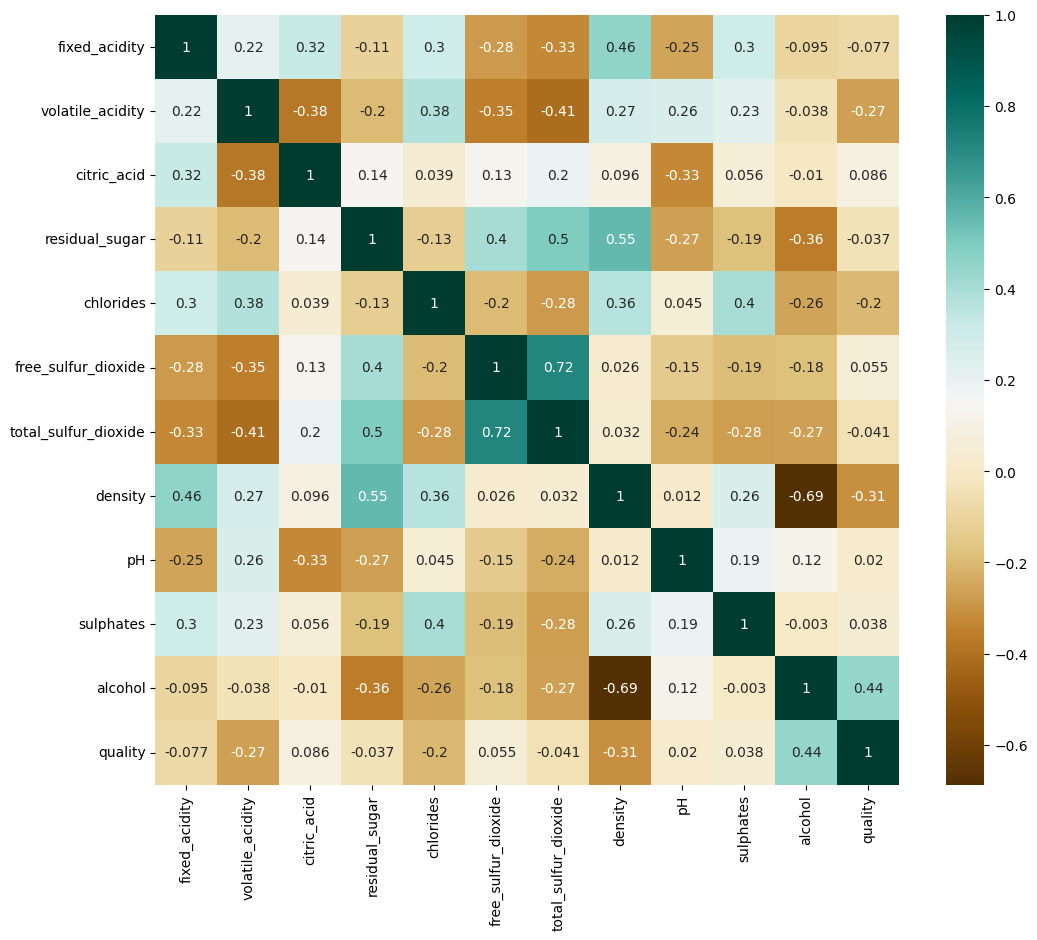

In [ ]:
# draw correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.show()


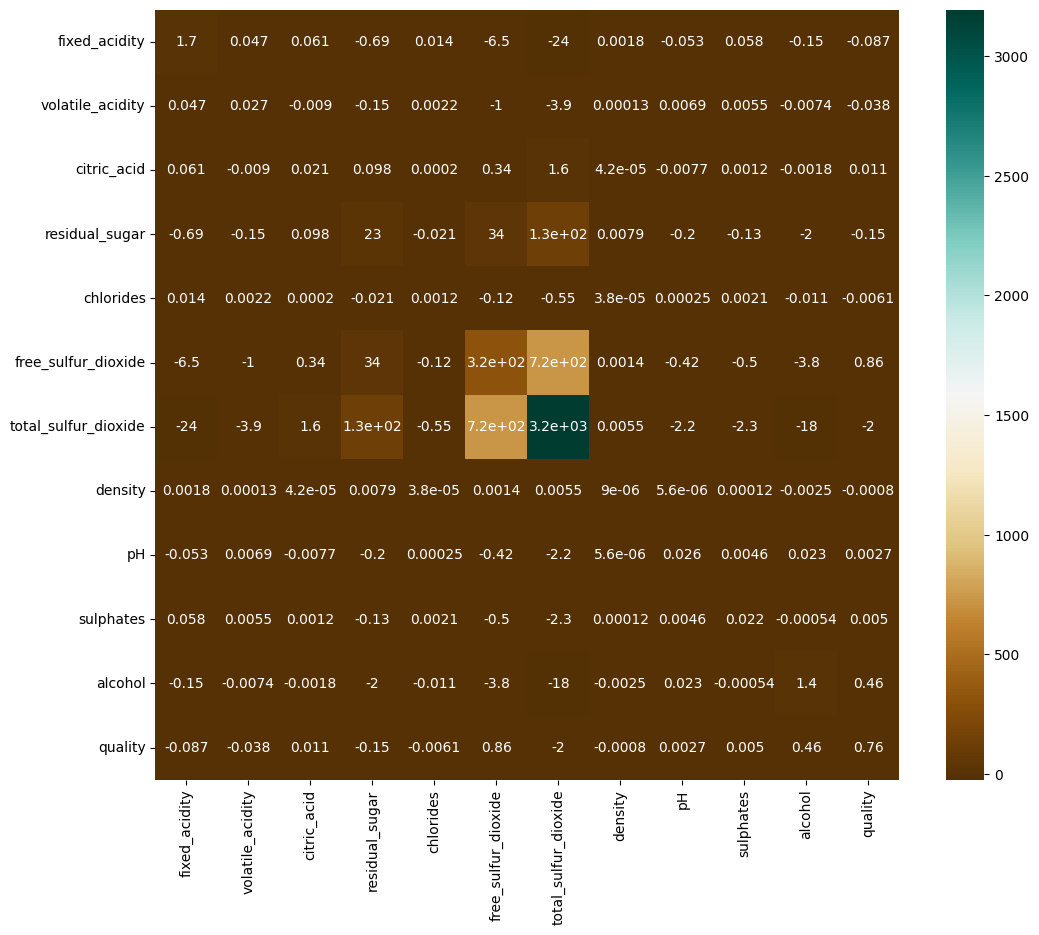

In [ ]:
# draw covariance matrix
cov = df.cov()
plt.figure(figsize=(12, 10))
sns.heatmap(cov, annot=True, cmap='BrBG')
plt.show()

In [ ]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,-84.111149,-0.145117
1,-48.779427,5.847319
2,-63.734575,-0.876416
3,-57.481266,-0.345098
4,-84.111149,-0.145117
...,...,...
6492,-24.741512,-0.916209
6493,57.017361,13.706750
6494,-4.896142,0.508568
6495,-8.188532,-8.973281


In [ ]:
# percentage of variance explained by each principal component
pca.explained_variance_ratio_

array([0.95355286, 0.04062238])

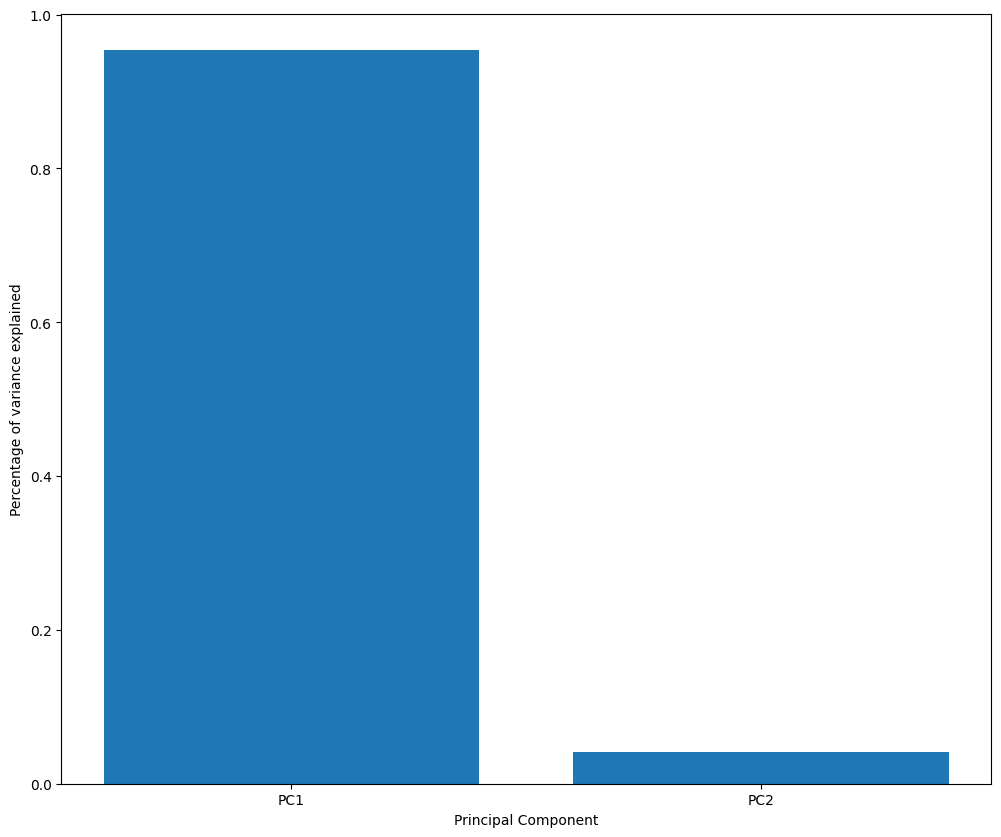

In [ ]:
# plot pca
plt.figure(figsize=(12, 10))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.show()

In [ ]:
# total variation in the data is explained by the first two principal components
pca.explained_variance_ratio_.sum()

0.9941752344641201

In [ ]:
# see what components are made of
print(pca.components_)
print(pca.get_feature_names_out())

[[-7.40794747e-03 -1.18432245e-03  4.86867386e-04  4.10197243e-02
  -1.68197676e-04  2.30481538e-01  9.72166737e-01  1.77246490e-06
  -6.55520709e-04 -7.04339125e-04 -5.45180769e-03 -5.32679832e-04]
 [-5.37151136e-03 -7.86983127e-04 -2.47169465e-04  1.86280097e-02
   6.68445065e-05  9.72618836e-01 -2.31394621e-01  1.27799964e-06
   6.48013240e-04  3.46546062e-04  2.87899807e-03  9.15205691e-03]]
['pca0' 'pca1']


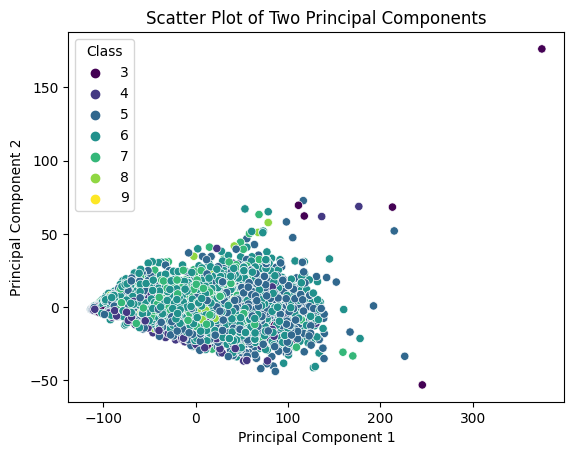

In [ ]:
df = pd.DataFrame(data=np.c_[df_pca, y], columns=['Principal Component 1', 'Principal Component 2', 'Class'])

# Scatter plot with different colors for each class
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class', data=df, palette='viridis')
plt.title('Scatter Plot of Two Principal Components')
plt.show()

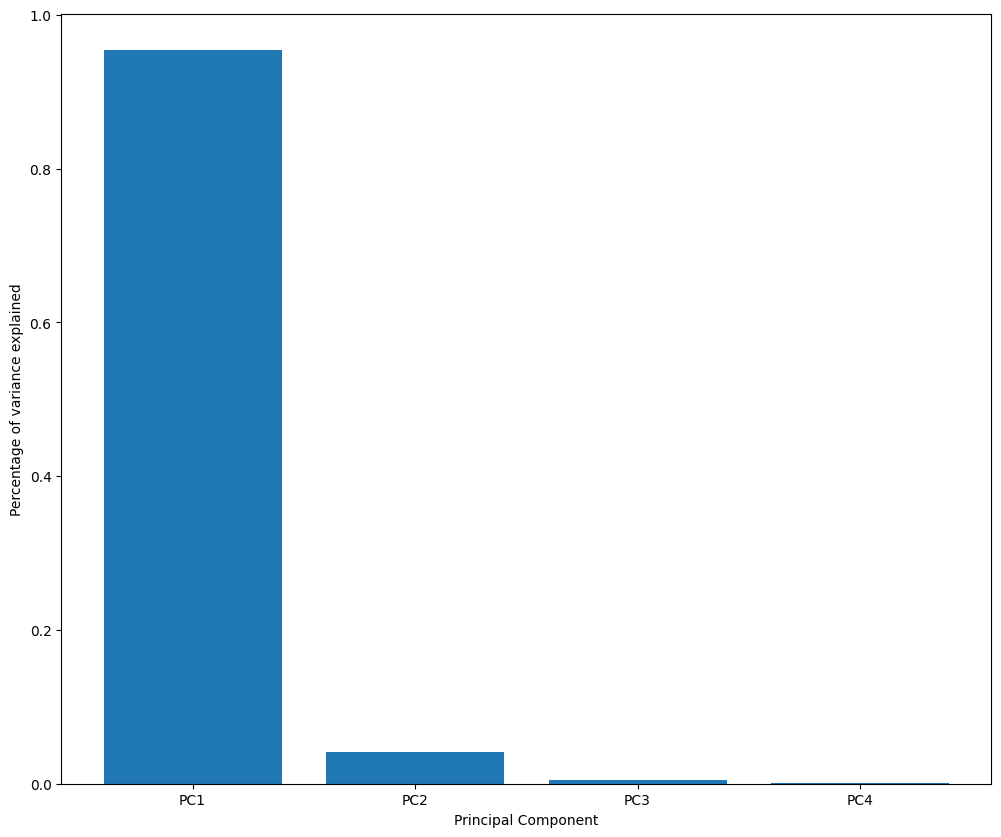

array([9.53758252e-01, 4.06277547e-02, 4.82625097e-03, 4.63879237e-04])

In [ ]:
# increase the number of principal components to 4
pca = PCA(n_components=4)
pca.fit(X)
df_pca = pca.transform(X)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

# plot the total variance explained by the first 4 principal components
plt.figure(figsize=(12, 10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.show()

pca.explained_variance_ratio_

In [ ]:
# sum of the variance explained by the first 2 principal components
pca.explained_variance_ratio_[:2].sum()

0.9943860068755606